In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [3]:
# Update path if needed
df = pd.read_csv("C:\ML Projects\ML datasets\CustomerIncome.csv")
df.head()


<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\shaun\AppData\Local\Temp\ipykernel_17368\385816327.py:2: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("C:\ML Projects\ML datasets\CustomerIncome.csv")


,Annual_Income_k$,Spending_Score
0,15,39
1,16,81
2,17,6
3,18,77
4,19,40


In [4]:
#clustering choice

# We’ll use Annual Income and Spending Score
X = df[['Annual_Income_k$', 'Spending_Score']]


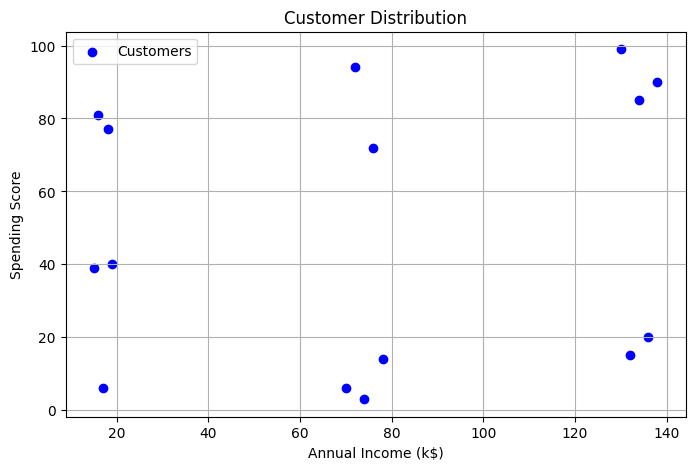

In [6]:
#visualizing data
plt.figure(figsize=(8,5))
plt.scatter(X['Annual_Income_k$'], X['Spending_Score'], c='blue', label='Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Customer Distribution')
plt.legend()
plt.grid(True)
plt.show()


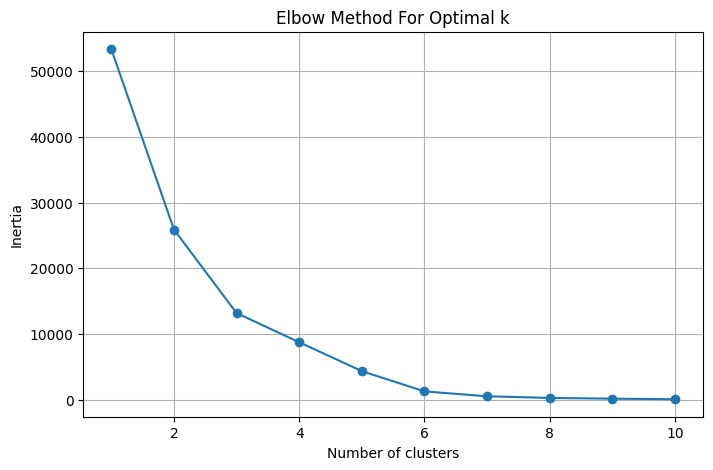

In [7]:
#Find the Optimal Number of Clusters (Elbow Method)

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)


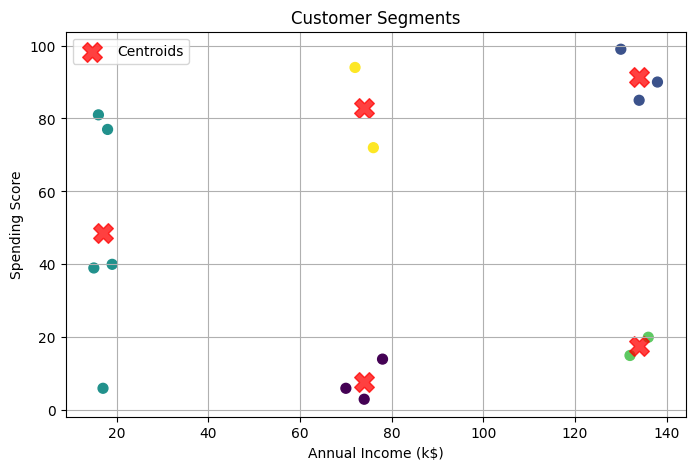

In [9]:
#Visualizing the clusters

plt.figure(figsize=(8,5))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, cmap='viridis', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
import pickle

with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

print("✅ Model saved as kmeans_model.pkl")


✅ Model saved as kmeans_model.pkl
